In [1]:
import os 
import sys
import pandas as pd

sys.path.append(os.path.abspath('../scripts'))

In [2]:
import pandas as pd

# Load data files
train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv', dtype={'StateHoliday': 'str'})
test_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\test.csv')
store_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\store.csv')

print("Train missing values:\n", train_file.isnull().sum())
print("\nTest missing values:\n", test_file.isnull().sum())
print("\nStore missing values:\n", store_file.isnull().sum())

# Fill missing values in the 'Open' column with the mode
test_file['Open'] = test_file['Open'].fillna(test_file['Open'].mode()[0])

Train missing values:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Test missing values:
 Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store missing values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [3]:
# Fill missing values in the store dataset
store_file['CompetitionDistance'] = store_file['CompetitionDistance'].fillna(store_file['CompetitionDistance'].median())
store_file['CompetitionOpenSinceMonth'] = store_file['CompetitionOpenSinceMonth'].fillna(-1)
store_file['CompetitionOpenSinceYear'] = store_file['CompetitionOpenSinceYear'].fillna(-1)
store_file['Promo2SinceWeek'] = store_file['Promo2SinceWeek'].fillna(-1)
store_file['Promo2SinceYear'] = store_file['Promo2SinceYear'].fillna(-1)
store_file['PromoInterval'] = store_file['PromoInterval'].fillna(-1)

# Check if missing values are handled
print("Missing values in store dataset after filling:")
print(store_file.isnull().sum())

# Convert 'Date' column to datetime
train_file['Date'] = pd.to_datetime(train_file['Date'])
test_file['Date'] = pd.to_datetime(test_file['Date'])

# Check the updated 'Date' column
print("Train 'Date' column after conversion:")
print(train_file['Date'].head())

print("\nTest 'Date' column after conversion:")
print(test_file['Date'].head())

# Create month segments
train_file['MonthSegment'] = pd.cut(train_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])
test_file['MonthSegment'] = pd.cut(test_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])

# Check the new 'MonthSegment' column
print("Train 'MonthSegment' column:")
print(train_file[['Date', 'MonthSegment']].head())

print("\nTest 'MonthSegment' column:")
print(test_file[['Date', 'MonthSegment']].head())

Missing values in store dataset after filling:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
Train 'Date' column after conversion:
0   2015-07-31
1   2015-07-31
2   2015-07-31
3   2015-07-31
4   2015-07-31
Name: Date, dtype: datetime64[ns]

Test 'Date' column after conversion:
0   2015-09-17
1   2015-09-17
2   2015-09-17
3   2015-09-17
4   2015-09-17
Name: Date, dtype: datetime64[ns]
Train 'MonthSegment' column:
        Date MonthSegment
0 2015-07-31          end
1 2015-07-31          end
2 2015-07-31          end
3 2015-07-31          end
4 2015-07-31          end

Test 'MonthSegment' column:
        Date MonthSegment
0 2015-09-17          mid
1 2015-09-17          mid
2 2015-09-17          mid
3 2015-09-17      

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv', dtype={'StateHoliday': 'str'})
test_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\test.csv')
store_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\store.csv')

# Step 1: Handle Missing Values
# 1.1 Test Dataset: Fill missing values in the 'Open' column with the mode
test_file['Open'] = test_file['Open'].fillna(test_file['Open'].mode()[0])

# 1.2 Store Dataset: Fill missing values
store_file['CompetitionDistance'] = store_file['CompetitionDistance'].fillna(store_file['CompetitionDistance'].median())
store_file['CompetitionOpenSinceMonth'] = store_file['CompetitionOpenSinceMonth'].fillna(-1)
store_file['CompetitionOpenSinceYear'] = store_file['CompetitionOpenSinceYear'].fillna(-1)
store_file['Promo2SinceWeek'] = store_file['Promo2SinceWeek'].fillna(-1)
store_file['Promo2SinceYear'] = store_file['Promo2SinceYear'].fillna(-1)
store_file['PromoInterval'] = store_file['PromoInterval'].fillna(-1)

# Step 2: Feature Extraction from 'Date' Column
# 2.1 Convert 'Date' column to datetime
train_file['Date'] = pd.to_datetime(train_file['Date'])
test_file['Date'] = pd.to_datetime(test_file['Date'])

# 2.2 Extract Weekdays
train_file['Weekday'] = train_file['Date'].dt.day_name()
test_file['Weekday'] = test_file['Date'].dt.day_name()

# 2.3 Create a Weekend Flag
train_file['Weekend'] = train_file['Date'].dt.dayofweek.isin([5, 6]).astype(int)
test_file['Weekend'] = test_file['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# 2.4 Create Month Segments
train_file['MonthSegment'] = pd.cut(train_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])
test_file['MonthSegment'] = pd.cut(test_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])

# 2.5 Days to Holidays
# Create a list of holiday dates
holiday_dates = train_file[(train_file['StateHoliday'] != '0') | (train_file['SchoolHoliday'] == 1)]['Date'].unique()
holiday_dates = pd.to_datetime(holiday_dates)

# Sort the holiday dates
holiday_dates = np.sort(holiday_dates)

# Function to calculate days to the next holiday
def days_to_next_holiday(date, holiday_dates):
    next_holiday = holiday_dates[holiday_dates >= date]
    if len(next_holiday) > 0:
        return (next_holiday[0] - date).days
    else:
        return np.nan  # No future holiday found

# Apply the function to calculate days to the next holiday
train_file['DaysToHoliday'] = train_file['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))
test_file['DaysToHoliday'] = test_file['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))

# Fill NaN values (if no future holiday exists) with a large number (e.g., 365)
train_file['DaysToHoliday'] = train_file['DaysToHoliday'].fillna(365)
test_file['DaysToHoliday'] = test_file['DaysToHoliday'].fillna(365)

# 2.6 Days After Holidays
# Function to calculate days since the last holiday
def days_since_last_holiday(date, holiday_dates):
    last_holiday = holiday_dates[holiday_dates <= date]
    if len(last_holiday) > 0:
        return (date - last_holiday[-1]).days
    else:
        return np.nan  # No past holiday found

# Apply the function to calculate days since the last holiday
train_file['DaysAfterHoliday'] = train_file['Date'].apply(lambda x: days_since_last_holiday(x, holiday_dates))
test_file['DaysAfterHoliday'] = test_file['Date'].apply(lambda x: days_since_last_holiday(x, holiday_dates))

# Fill NaN values (if no past holiday exists) with a large number (e.g., 365)
train_file['DaysAfterHoliday'] = train_file['DaysAfterHoliday'].fillna(365)
test_file['DaysAfterHoliday'] = test_file['DaysAfterHoliday'].fillna(365)

# Step 3: Merge Datasets
# Merge train and store datasets
train_file = train_file.merge(store_file, on='Store', how='left')
test_file = test_file.merge(store_file, on='Store', how='left')

# Step 4: Scale Numeric Features
# Select numeric columns to scale (only columns present in both datasets)
numeric_cols = ['CompetitionDistance', 'Promo2SinceWeek', 'Promo2SinceYear']

# Initialize the scaler
scaler = StandardScaler()

# Scale numeric columns in train and test datasets
train_file[numeric_cols] = scaler.fit_transform(train_file[numeric_cols])
test_file[numeric_cols] = scaler.transform(test_file[numeric_cols])

# Display the final preprocessed datasets
print("Train Dataset after Preprocessing:")
print(train_file.head())

print("\nTest Dataset after Preprocessing:")
print(test_file.head())

Train Dataset after Preprocessing:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday Weekday  ...  DaysAfterHoliday StoreType  Assortment  \
0              1  Friday  ...                 0         c           a   
1              1  Friday  ...                 0         a           a   
2              1  Friday  ...                 0         a           a   
3              1  Friday  ...                 0         c           c   
4              1  Friday  ...                 0         a           a   

   CompetitionDistance CompetitionOpenSinceMonth Competit

In [5]:
import pandas as pd
import joblib
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from datetime import datetime
from sklearn.compose import ColumnTransformer

# Function to merge train/test with store data
def merge_data(train_file, test_file, store_file):
    """
    Merge the train/test and store data based on the 'Store' column.
    Accepts either file paths or DataFrames as inputs.
    """
    # Check if input is a file path, and read as DataFrame if necessary
    if isinstance(train_file, str):
        train_df = pd.read_csv(train_file, dtype={'StateHoliday': 'str'})
    else:
        train_df = train_file

    if isinstance(store_file, str):
        store_df = pd.read_csv(store_file)
    else:
        store_df = store_file

    # Merge train and store data
    train_merged = pd.merge(train_df, store_df, how='inner', on='Store')

    test_merged = None  # Default test_merged to None
    if test_file is not None:
        if isinstance(test_file, str):
            test_df = pd.read_csv(test_file)
        else:
            test_df = test_file

        # Merge test and store data
        test_merged = pd.merge(test_df, store_df, how='inner', on='Store')

    return train_merged, test_merged

# Feature Engineering: Extract new features from datetime columns
def create_date_features(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    return df

def convert_state_holiday(df):
    df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
    return df

def encode_categorical_columns(train_df, test_df):
    categorical_cols = ['StoreType', 'Assortment', 'PromoInterval']
    preprocessor = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
        remainder='passthrough'
    )

    # For the training dataset, drop 'Sales' and 'Customers'
    train_features = train_df.drop(columns=['Sales', 'Customers'], errors='ignore')
    
    # For the test dataset, drop 'Customers' if it exists
    test_features = test_df.drop(columns=['Customers'], errors='ignore')

    # Fit the encoder on the training data and transform both train and test
    train_df_encoded = preprocessor.fit_transform(train_features)
    test_df_encoded = preprocessor.transform(test_features)

    # Get feature names after encoding
    encoded_cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    encoded_cat_names = [name.replace(',', '_') for name in encoded_cat_names]
    numeric_cols = train_features.drop(columns=categorical_cols).columns
    final_feature_names = np.concatenate([encoded_cat_names, numeric_cols])

    return train_df_encoded, test_df_encoded, final_feature_names

def preprocess_data(train_df, test_df):
    train_df = create_date_features(train_df)
    test_df = create_date_features(test_df)

    # Drop the original 'Date' column after feature extraction
    train_df.drop(columns=['Date'], inplace=True)
    test_df.drop(columns=['Date'], inplace=True)

    train_df = convert_state_holiday(train_df)
    test_df = convert_state_holiday(test_df)

    # Handle Missing Values in Categorical Columns (e.g., 'StoreType', 'Assortment')
    train_df['StoreType'].fillna('unknown', inplace=True)
    test_df['StoreType'].fillna('unknown', inplace=True)

    train_df['Assortment'].fillna('unknown', inplace=True)
    test_df['Assortment'].fillna('unknown', inplace=True)

    train_df_encoded, test_df_encoded, final_feature_names = encode_categorical_columns(train_df, test_df)

    # Convert encoded data back into DataFrame format with proper column names
    train_df_encoded = pd.DataFrame(train_df_encoded, columns=final_feature_names)
    test_df_encoded = pd.DataFrame(test_df_encoded, columns=final_feature_names)

    # Add back the 'Sales' column to the processed train dataset
    if 'Sales' in train_df.columns:
        train_df_encoded['Sales'] = train_df['Sales'].values

    return train_df_encoded, test_df_encoded

# Model building function
def build_model(train_df, target_column):
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    if target_column not in train_df.columns:
        raise KeyError(f"'{target_column}' not found in DataFrame.")
    
    # Define features (X) and target (y)
    X = train_df.drop(columns=[target_column])
    y = train_df[target_column]

    # Convert all column names in X to strings
    X.columns = X.columns.astype(str)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the pipeline
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42))
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Evaluate the model using cross-validation
    cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'Cross-validation RMSE: {(-cv_scores.mean()) ** 0.5}')

    # Predict on validation data
    y_pred = model_pipeline.predict(X_val)
    val_rmse = rmse(y_val, y_pred)
    print(f'Validation RMSE: {val_rmse}')

    return model_pipeline, X_train, X_val, y_train, y_val

# Prediction function
def prediction():
    """
    Main function to load data, preprocess, train, and save the model.
    """
    # Load data files into DataFrames
    train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv')
    test_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\test.csv')
    store_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\store.csv')

    # Merge data
    train_merged, test_merged = merge_data(train_file, test_file, store_file)

    # Ensure 'Sales' column exists in the merged training data
    if 'Sales' not in train_merged.columns:
        raise KeyError("'Sales' column is missing in the merged training data.")

    # Preprocess data
    processed_train, processed_test = preprocess_data(train_merged, test_merged)

    # Ensure 'Sales' column exists in the processed training data
    if 'Sales' not in processed_train.columns:
        raise KeyError("'Sales' column is missing after preprocessing.")

    # Build and train the model
    model_pipeline, X_train, X_val, y_train, y_val = build_model(processed_train, target_column='Sales')

    # Save the trained model with a timestamped filename
    timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    model_filename = f"random_forest_model_{timestamp}.pkl"
    joblib.dump(model_pipeline, model_filename)

    return model_pipeline, X_train, X_val, y_train, y_val

prediction()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:158: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method wi

Cross-validation RMSE: 841.8277319175766
Validation RMSE: 829.5788933576891


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('rf',
                  RandomForestRegressor(n_estimators=50, n_jobs=-1,
                                        random_state=42))]),
        StoreType_a StoreType_b StoreType_c StoreType_d Assortment_a  \
 417683         1.0         0.0         0.0         0.0          0.0   
 659402         0.0         0.0         0.0         1.0          0.0   
 739873         0.0         0.0         0.0         1.0          0.0   
 109671         0.0         0.0         1.0         0.0          0.0   
 422541         0.0         0.0         0.0         1.0          0.0   
 ...            ...         ...         ...         ...          ...   
 259178         1.0         0.0         0.0         0.0          1.0   
 365838         1.0         0.0         0.0         0.0          0.0   
 131932         1.0         0.0         0.0         0.0          1.0   
 671155         0.0         0.0         0.0         1.0          1.0   
 121958 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:158: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method wi

Cross-validation RMSE: 841.8277319175766
Validation RMSE: 829.5788933576891
Feature names: Index(['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb_May_Aug_Nov', 'PromoInterval_Jan_Apr_Jul_Oct',
       'PromoInterval_Mar_Jun_Sept_Dec', 'PromoInterval_nan', 'Store',
       'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend'],
      dtype='object')


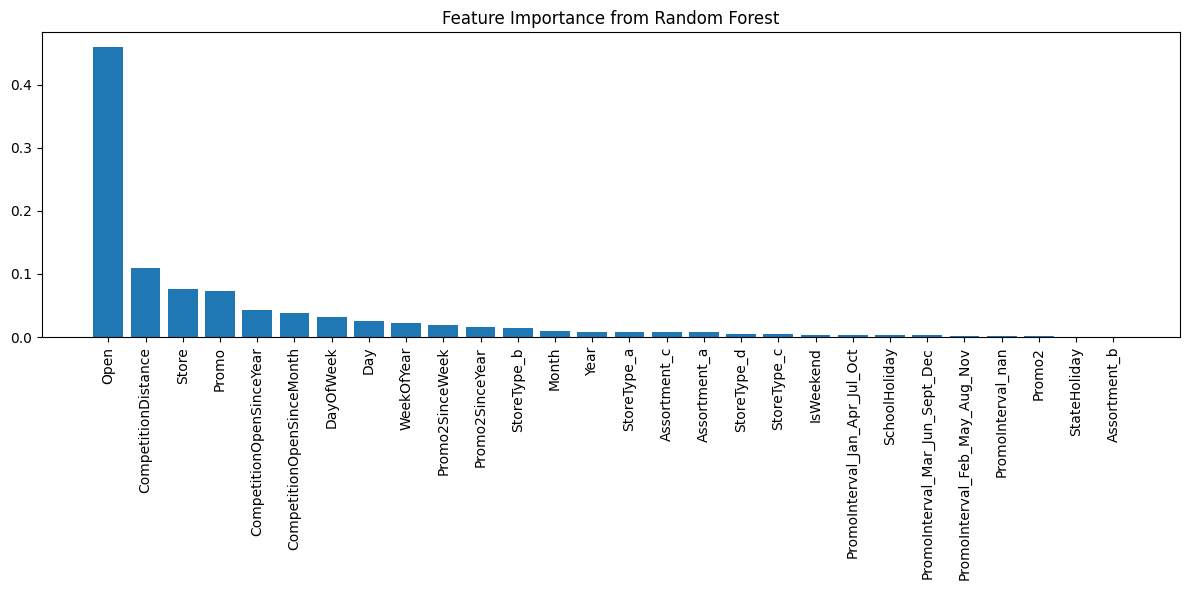

c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without

Prediction: 0.00, Lower Bound: 18762.34, Upper Bound: 29673.74
Prediction: 5244.76, Lower Bound: 3536.37, Upper Bound: 14006.07
Prediction: 5952.56, Lower Bound: 18762.34, Upper Bound: 29673.74
Prediction: 3641.92, Lower Bound: 17253.97, Upper Bound: 30583.91
Prediction: 13660.66, Lower Bound: 3034.08, Upper Bound: 15057.12
Prediction: 0.00, Lower Bound: 18762.34, Upper Bound: 29673.74
Prediction: 15542.76, Lower Bound: 3326.04, Upper Bound: 32610.00
Prediction: 6859.78, Lower Bound: 3536.37, Upper Bound: 14006.07
Prediction: 9790.22, Lower Bound: 3571.48, Upper Bound: 13990.64
Prediction: 8367.56, Lower Bound: 7360.30, Upper Bound: 38101.02


In [6]:
from estimate_confidence import estimate_confidence_intervals
from plot_feature_importance import plot_feature_importance

# Call the prediction function and get the model, train and validation data
model_pipeline, X_train, X_val, y_train, y_val = prediction()

# Display the feature names after processing
print("Feature names:", X_train.columns)


# Plot feature importance
plot_feature_importance(model_pipeline, X_train.columns)

# Estimate confidence intervals
lower_bound, upper_bound = estimate_confidence_intervals(model_pipeline, X_val)

# Show the predictions with confidence intervals
y_pred = model_pipeline.predict(X_val)
for i in range(10):  # Showing first 10 predictions and intervals
    print(f"Prediction: {y_pred[i]:.2f}, Lower Bound: {lower_bound[i]:.2f}, Upper Bound: {upper_bound[i]:.2f}")